In [2]:
import pandas as pd
import numpy as np
import seaborn as sns

In [3]:
import matplotlib.pyplot as plt

In [4]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [5]:
from sklearn.model_selection import GridSearchCV

In [6]:
from sklearn.linear_model import LinearRegression

In [7]:
from sklearn.svm import SVR

In [8]:
import xgboost as xgb

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
Data = pd.read_csv(r"C:\Users\banga\OneDrive\Desktop\Forecasting\archive (1)\air_pollution_data.csv")

In [11]:
Data

,city,date,aqi,co,no,no2,o3,so2,pm2_5,pm10,nh3
0,Ahmedabad,30-11-2020,5,520.71,2.38,16.28,130.18,47.68,65.96,72.13,8.36
1,Ahmedabad,01-12-2020,5,1682.28,7.71,54.84,0.73,21.70,120.95,154.53,27.36
2,Ahmedabad,02-12-2020,5,1815.80,16.54,49.35,0.17,23.84,133.47,172.63,28.12
3,Ahmedabad,03-12-2020,5,2296.45,41.57,40.10,0.00,35.76,150.37,202.15,36.48
4,Ahmedabad,04-12-2020,5,2189.64,23.92,58.95,0.02,28.13,160.79,205.80,40.53
...,...,...,...,...,...,...,...,...,...,...,...
23499,Visakhapatnam,21-05-2023,3,353.81,0.00,2.08,100.14,4.11,37.53,47.09,0.08
23500,Visakhapatnam,22-05-2023,3,380.52,0.00,3.77,82.97,5.07,32.17,43.44,1.74
23501,Visakhapatnam,23-05-2023,3,390.53,0.00,4.28,80.11,5.19,36.01,48.06,1.20
23502,Visakhapatnam,24-05-2023,3,300.41,0.00,1.36,95.84,2.21,30.17,48.89,0.00


In [12]:
Data.columns

Index(['city', 'date', 'aqi', 'co', 'no', 'no2', 'o3', 'so2', 'pm2_5', 'pm10',
       'nh3'],
      dtype='object')

In [13]:
df = Data.copy()

In [14]:
df

,city,date,aqi,co,no,no2,o3,so2,pm2_5,pm10,nh3
0,Ahmedabad,30-11-2020,5,520.71,2.38,16.28,130.18,47.68,65.96,72.13,8.36
1,Ahmedabad,01-12-2020,5,1682.28,7.71,54.84,0.73,21.70,120.95,154.53,27.36
2,Ahmedabad,02-12-2020,5,1815.80,16.54,49.35,0.17,23.84,133.47,172.63,28.12
3,Ahmedabad,03-12-2020,5,2296.45,41.57,40.10,0.00,35.76,150.37,202.15,36.48
4,Ahmedabad,04-12-2020,5,2189.64,23.92,58.95,0.02,28.13,160.79,205.80,40.53
...,...,...,...,...,...,...,...,...,...,...,...
23499,Visakhapatnam,21-05-2023,3,353.81,0.00,2.08,100.14,4.11,37.53,47.09,0.08
23500,Visakhapatnam,22-05-2023,3,380.52,0.00,3.77,82.97,5.07,32.17,43.44,1.74
23501,Visakhapatnam,23-05-2023,3,390.53,0.00,4.28,80.11,5.19,36.01,48.06,1.20
23502,Visakhapatnam,24-05-2023,3,300.41,0.00,1.36,95.84,2.21,30.17,48.89,0.00


In [15]:
df.dtypes

city      object
date      object
aqi        int64
co       float64
no       float64
no2      float64
o3       float64
so2      float64
pm2_5    float64
pm10     float64
nh3      float64
dtype: object

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23504 entries, 0 to 23503
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   city    23504 non-null  object 
 1   date    23504 non-null  object 
 2   aqi     23504 non-null  int64  
 3   co      23504 non-null  float64
 4   no      23504 non-null  float64
 5   no2     23504 non-null  float64
 6   o3      23504 non-null  float64
 7   so2     23504 non-null  float64
 8   pm2_5   23504 non-null  float64
 9   pm10    23504 non-null  float64
 10  nh3     23504 non-null  float64
dtypes: float64(8), int64(1), object(2)
memory usage: 2.0+ MB


In [17]:
 df["aqi"].skew()

-1.0153227710542003

<Axes: xlabel='aqi', ylabel='Count'>

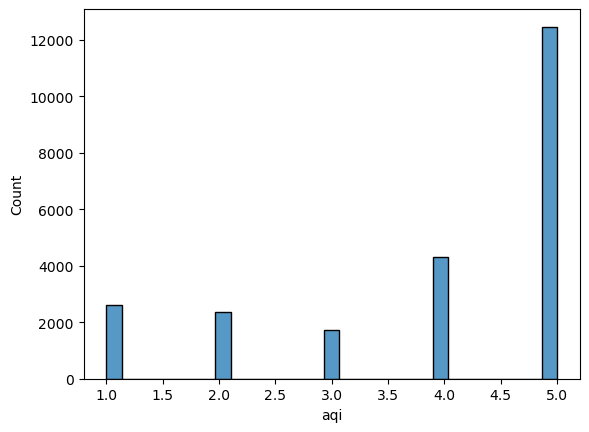

In [18]:
sns.histplot(df["aqi"])

C:\Users\banga\AppData\Local\Temp\ipykernel_14048\2321578220.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["aqi"])


<Axes: xlabel='aqi', ylabel='Density'>

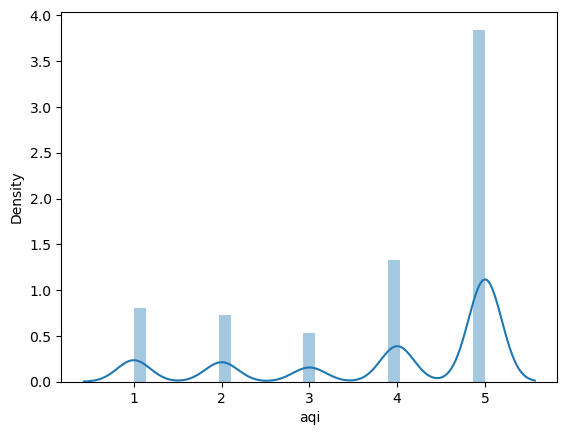

In [19]:
sns.distplot(df["aqi"])

In [20]:
from scipy.stats import norm

C:\Users\banga\AppData\Local\Temp\ipykernel_14048\3327732193.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["aqi"], fit=norm)


<Axes: xlabel='aqi', ylabel='Density'>

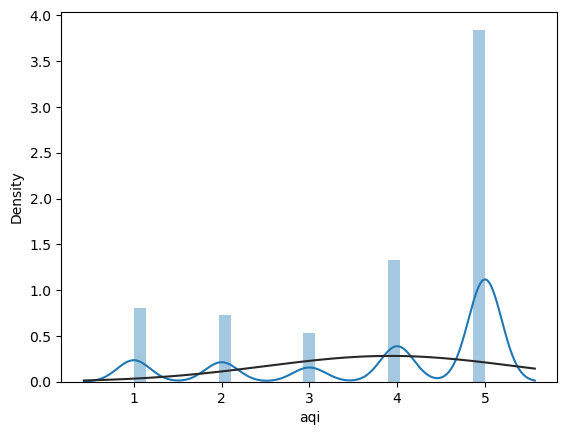

In [21]:
sns.distplot(df["aqi"], fit=norm)

<Axes: xlabel='aqi', ylabel='co'>

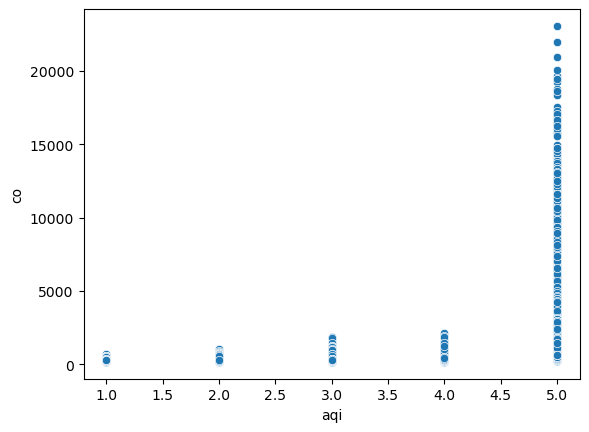

In [22]:
sns.scatterplot(x = "aqi", y= "co",data = df)

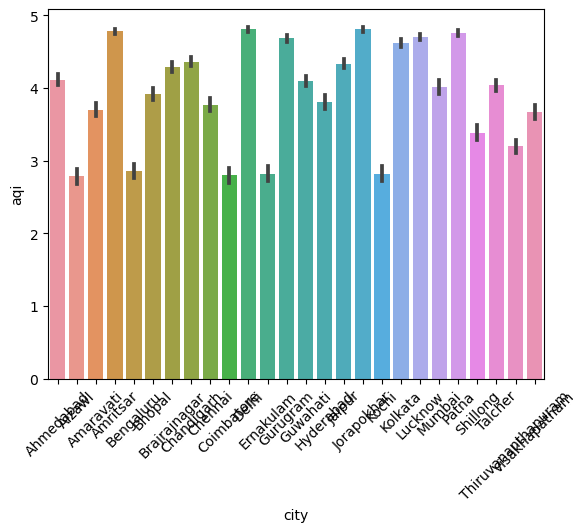

In [23]:
sns.barplot(data = df, x = "city", y = "aqi")
plt.xticks(rotation = 45)
plt.show()

In [24]:
df[['aqi', 'co', 'no', 'no2', 'o3', 'so2', 'pm2_5', 'pm10',
       'nh3']].corr()

,aqi,co,no,no2,o3,so2,pm2_5,pm10,nh3
aqi,1.000000,0.377355,0.173879,0.440113,0.085184,0.303629,0.456002,0.467122,0.361675
co,0.377355,1.000000,0.843799,0.805820,-0.313232,0.631510,0.929881,0.935345,0.603286
no,0.173879,0.843799,1.000000,0.499226,-0.267879,0.532777,0.719160,0.718655,0.416600
no2,0.440113,0.805820,0.499226,1.000000,-0.380578,0.708760,0.737977,0.755135,0.608555
o3,0.085184,-0.313232,-0.267879,-0.380578,1.000000,-0.163729,-0.191523,-0.203824,-0.192751
so2,0.303629,0.631510,0.532777,0.708760,-0.163729,1.000000,0.552935,0.562396,0.468437
pm2_5,0.456002,0.929881,0.719160,0.737977,-0.191523,0.552935,1.000000,0.990648,0.558785
pm10,0.467122,0.935345,0.718655,0.755135,-0.203824,0.562396,0.990648,1.000000,0.586979
nh3,0.361675,0.603286,0.416600,0.608555,-0.192751,0.468437,0.558785,0.586979,1.000000


<Axes: >

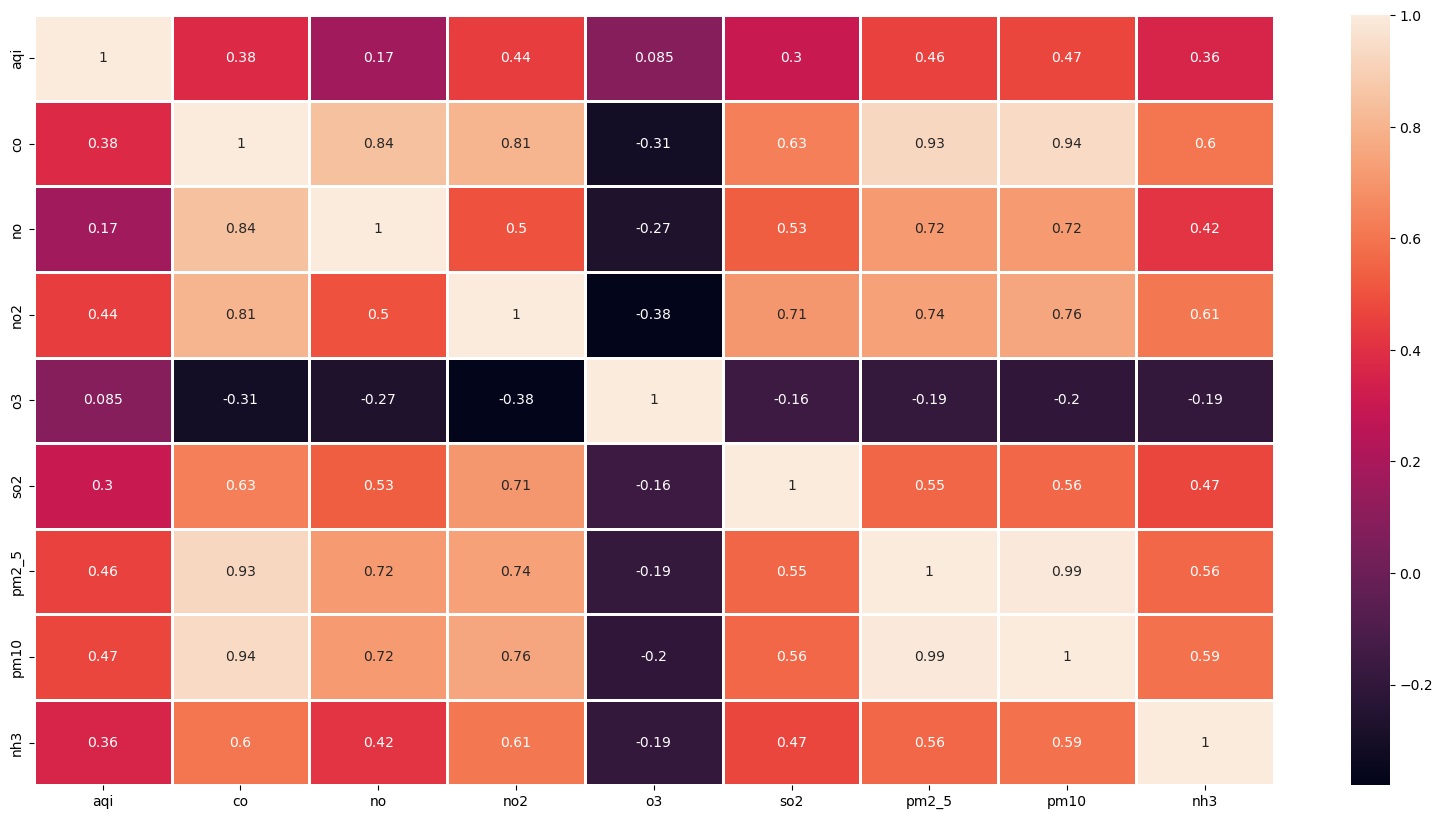

In [25]:
plt.figure(figsize=(20,10))
sns.heatmap(df[['aqi', 'co', 'no', 'no2', 'o3', 'so2', 'pm2_5', 'pm10',
       'nh3']].corr(),linewidths=2,annot=True)

<Axes: >

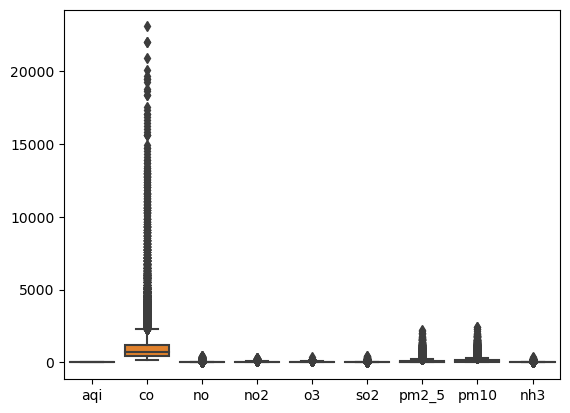

In [26]:
sns.boxplot(df)

In [27]:
df.columns #Auto Error detection

Index(['city', 'date', 'aqi', 'co', 'no', 'no2', 'o3', 'so2', 'pm2_5', 'pm10',
       'nh3'],
      dtype='object')

In [28]:
df.column=['aqi', 'co', 'no', 'no2', 'o3', 'so2', 'pm2_5', 'pm10', 'nh3']

C:\Users\banga\AppData\Local\Temp\ipykernel_14048\3447759032.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df.column=['aqi', 'co', 'no', 'no2', 'o3', 'so2', 'pm2_5', 'pm10', 'nh3']


In [29]:
for i in df.column:
    sk=df[i].skew()
    sk=np.round(sk)
    if sk!=0:
        q1=df[i].quantile(0.25)
        q3=df[i].quantile(0.75)
        iqr=q3-q1
        low=q1-(1.5*iqr)
        high=q3+(1.5*iqr)
        df[i]=df[i].map(lambda x: low if x<low else high if x>high else x)
    else:
        m=df[i].mean()
        s=df[i].std()
        lower=m-(3*s)
        upper=m+(3*s)
        df[i]=df[i].map(lambda x: lower if x< lower else upper if x>upper else x)
        

<Axes: >

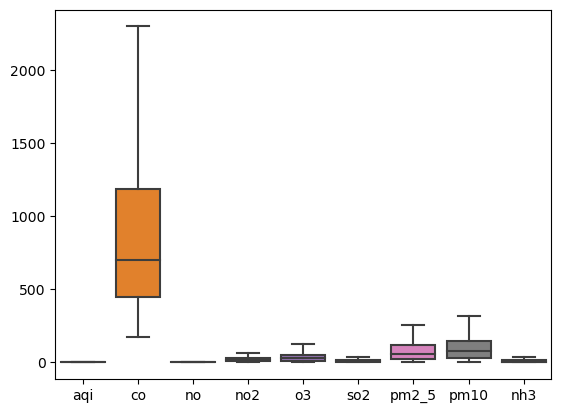

In [30]:
sns.boxplot(df)

In [31]:
df.isna().sum()

city     0
date     0
aqi      0
co       0
no       0
no2      0
o3       0
so2      0
pm2_5    0
pm10     0
nh3      0
dtype: int64

In [32]:
df.describe()

,aqi,co,no,no2,o3,so2,pm2_5,pm10,nh3
count,23504.000000,23504.000000,23504.000000,23504.000000,23504.000000,23504.000000,23504.000000,23504.000000,23504.000000
mean,3.920354,922.398252,0.172619,23.024453,34.850229,12.109689,83.488548,104.783819,10.476083
std,1.415490,633.937659,0.278178,18.932238,31.124367,10.542842,75.670030,93.075002,10.370085
min,1.000000,173.570000,0.000000,0.310000,0.000000,0.190000,0.500000,0.580000,0.000000
25%,3.000000,447.270000,0.000000,8.740000,7.870000,4.470000,24.677500,32.277500,2.340000
50%,5.000000,700.950000,0.000000,16.450000,28.250000,7.990000,58.860000,75.775000,6.520000
75%,5.000000,1188.280000,0.270000,32.220000,54.360000,16.450000,117.605000,147.642500,15.830000
max,5.000000,2299.795000,0.675000,67.440000,124.095000,34.420000,256.996250,320.690000,36.065000


In [33]:
# Convert 'date' column to datetime if it's not already in datetime format
df['date'] = pd.to_datetime(df['date'])

# Find the start date
start_date = df['date'].min()

print("Start Date:", start_date)

Start Date: 2020-11-30 00:00:00


C:\Users\banga\AppData\Local\Temp\ipykernel_14048\3788838715.py:2: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['date'] = pd.to_datetime(df['date'])


In [34]:
# Convert 'date' column to datetime if it's not already in datetime format
df['date'] = pd.to_datetime(df['date'])

# Find the end date
end_date = df['date'].max()

print("End Date:", end_date)

End Date: 2023-05-25 00:00:00


In [35]:
df["aqi"].value_counts()

aqi
5    12458
4     4324
1     2618
2     2372
3     1732
Name: count, dtype: int64

<Axes: ylabel='count'>

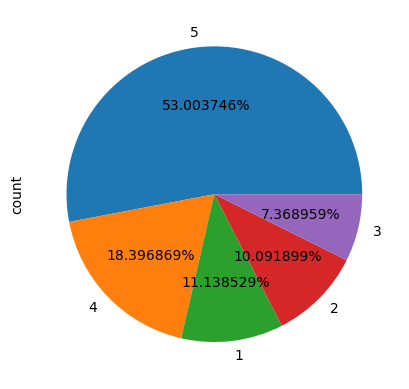

In [36]:
df["aqi"].value_counts().plot(kind="pie",autopct="%2f%%")

In [94]:
df['city'].value_counts()

city
Ahmedabad             904
Aizawl                904
Thiruvananthapuram    904
Talcher               904
Shillong              904
Patna                 904
Mumbai                904
Lucknow               904
Kolkata               904
Kochi                 904
Jorapokhar            904
Jaipur                904
Hyderabad             904
Guwahati              904
Gurugram              904
Ernakulam             904
Delhi                 904
Coimbatore            904
Chennai               904
Chandigarh            904
Brajrajnagar          904
Bhopal                904
Bengaluru             904
Amritsar              904
Amaravati             904
Visakhapatnam         904
Name: count, dtype: int64

In [95]:
df

,city,date,aqi,co,no,no2,o3,so2,pm2_5,pm10,nh3
0,Ahmedabad,2020-11-30,5,520.71,0.675,16.28,124.095,34.42,65.96,72.13,8.360
1,Ahmedabad,2020-12-01,5,1682.28,0.675,54.84,0.730,21.70,120.95,154.53,27.360
2,Ahmedabad,2020-12-02,5,1815.80,0.675,49.35,0.170,23.84,133.47,172.63,28.120
3,Ahmedabad,2020-12-03,5,2296.45,0.675,40.10,0.000,34.42,150.37,202.15,36.065
4,Ahmedabad,2020-12-04,5,2189.64,0.675,58.95,0.020,28.13,160.79,205.80,36.065
...,...,...,...,...,...,...,...,...,...,...,...
23499,Visakhapatnam,2023-05-21,3,353.81,0.000,2.08,100.140,4.11,37.53,47.09,0.080
23500,Visakhapatnam,2023-05-22,3,380.52,0.000,3.77,82.970,5.07,32.17,43.44,1.740
23501,Visakhapatnam,2023-05-23,3,390.53,0.000,4.28,80.110,5.19,36.01,48.06,1.200
23502,Visakhapatnam,2023-05-24,3,300.41,0.000,1.36,95.840,2.21,30.17,48.89,0.000


<Axes: xlabel='aqi'>

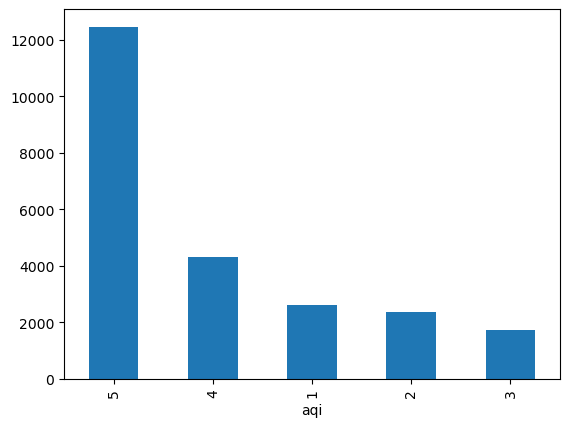

In [97]:
df["aqi"].value_counts().plot(kind="bar")

In [98]:
hyderabad_aqi = df[df['city'] == 'Hyderabad']

In [99]:
hyderabad_aqi

,city,date,aqi,co,no,no2,o3,so2,pm2_5,pm10,nh3
12656,Hyderabad,2020-11-30,5,514.030,0.675,10.45,124.095,23.37,59.50,62.85,4.37
12657,Hyderabad,2020-12-01,5,2029.420,0.675,47.30,0.020,24.08,150.99,175.15,10.89
12658,Hyderabad,2020-12-02,5,2299.795,0.675,47.98,0.000,20.03,167.66,191.94,6.59
12659,Hyderabad,2020-12-03,5,2299.795,0.675,67.44,1.200,29.33,233.19,257.01,19.51
12660,Hyderabad,2020-12-04,5,2299.795,0.675,65.80,0.010,23.37,208.51,228.61,10.89
...,...,...,...,...,...,...,...,...,...,...,...
13555,Hyderabad,2023-05-21,4,1134.870,0.070,43.87,36.480,20.03,73.40,110.09,11.27
13556,Hyderabad,2023-05-22,5,1214.980,0.000,39.76,45.780,22.89,80.13,112.83,13.93
13557,Hyderabad,2023-05-23,5,2299.795,0.675,61.69,0.000,34.42,160.91,197.67,24.07
13558,Hyderabad,2023-05-24,5,2299.795,0.675,67.44,13.230,34.33,151.01,179.51,15.58


<Axes: xlabel='aqi'>

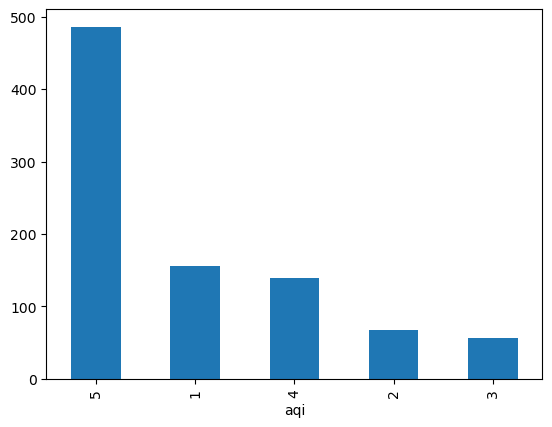

In [100]:
hyderabad_aqi["aqi"].value_counts().plot(kind="bar")


<Axes: xlabel='aqi'>

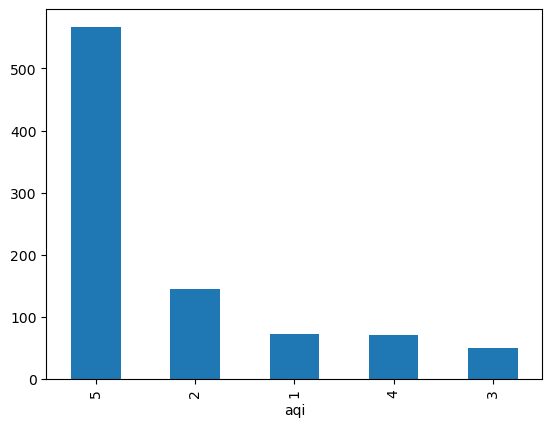

In [101]:
Mumbai_aqi = df[df['city'] == 'Mumbai']
Mumbai_aqi["aqi"].value_counts().plot(kind="bar")


<Axes: xlabel='aqi'>

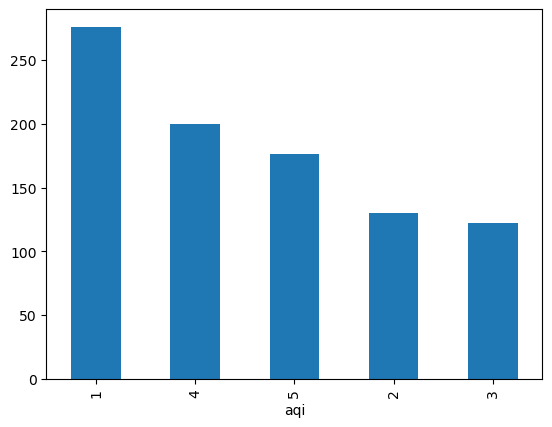

In [102]:
Bengaluru_aqi = df[df['city'] == 'Bengaluru']
Bengaluru_aqi["aqi"].value_counts().plot(kind="bar")

<Axes: xlabel='aqi'>

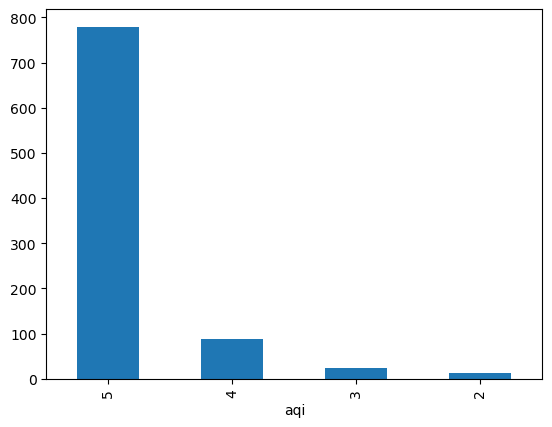

In [103]:
Delhi_aqi = df[df['city'] == 'Delhi']
Delhi_aqi["aqi"].value_counts().plot(kind="bar")

<Axes: xlabel='aqi'>

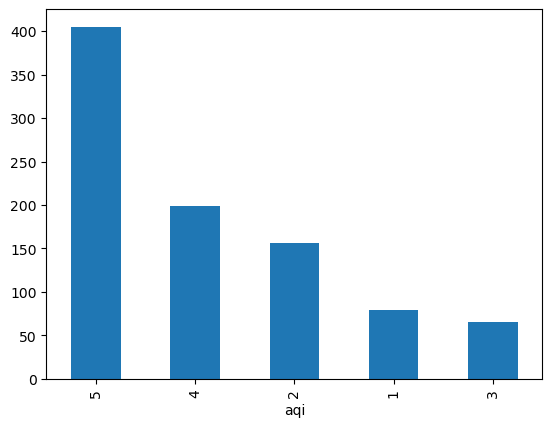

In [104]:
Chennai_aqi = df[df['city'] == 'Chennai']
Chennai_aqi["aqi"].value_counts().plot(kind="bar")

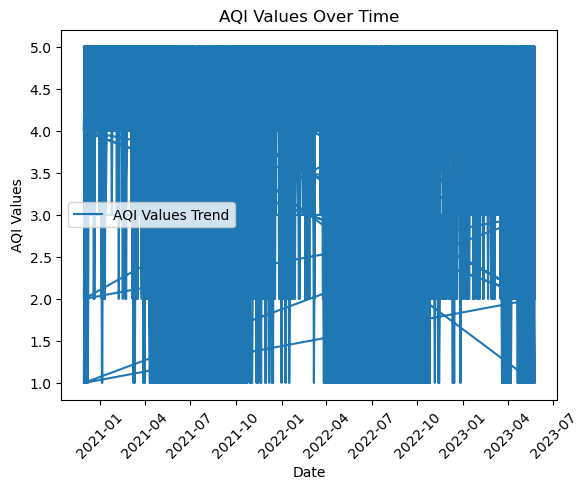

In [105]:
plt.plot(df['date'], df['aqi'], label='AQI Values Trend')

plt.xlabel('Date')
plt.ylabel('AQI Values')
plt.title('AQI Values Over Time')
plt.legend()  # Show legend
plt.xticks(rotation=45)
plt.show()


In [106]:
###########################################

In [107]:
df1 = df.drop(['city'], axis = 1)

In [108]:
df1

,date,aqi,co,no,no2,o3,so2,pm2_5,pm10,nh3
0,2020-11-30,5,520.71,0.675,16.28,124.095,34.42,65.96,72.13,8.360
1,2020-12-01,5,1682.28,0.675,54.84,0.730,21.70,120.95,154.53,27.360
2,2020-12-02,5,1815.80,0.675,49.35,0.170,23.84,133.47,172.63,28.120
3,2020-12-03,5,2296.45,0.675,40.10,0.000,34.42,150.37,202.15,36.065
4,2020-12-04,5,2189.64,0.675,58.95,0.020,28.13,160.79,205.80,36.065
...,...,...,...,...,...,...,...,...,...,...
23499,2023-05-21,3,353.81,0.000,2.08,100.140,4.11,37.53,47.09,0.080
23500,2023-05-22,3,380.52,0.000,3.77,82.970,5.07,32.17,43.44,1.740
23501,2023-05-23,3,390.53,0.000,4.28,80.110,5.19,36.01,48.06,1.200
23502,2023-05-24,3,300.41,0.000,1.36,95.840,2.21,30.17,48.89,0.000


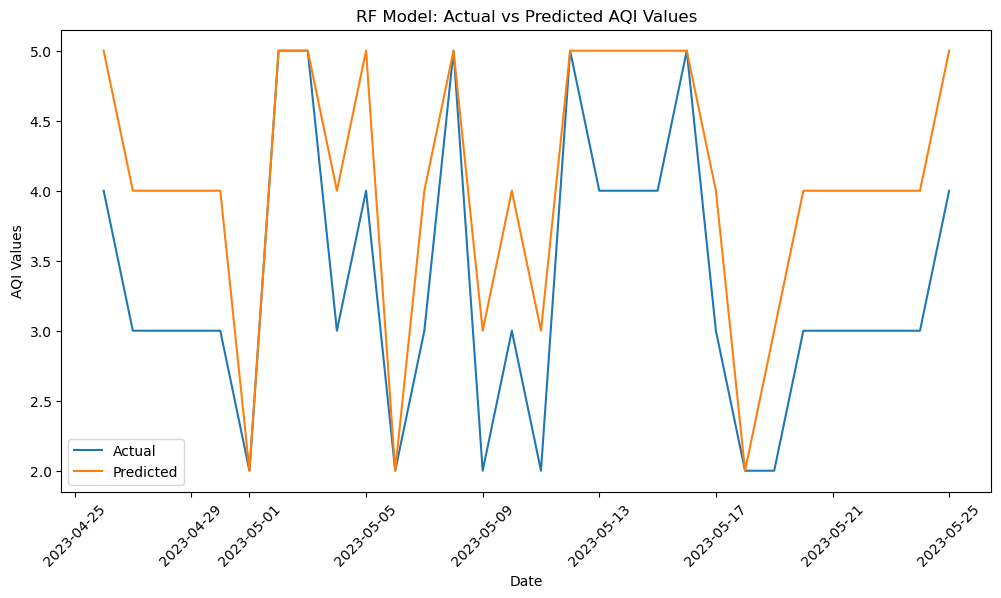

Mean Squared Error: 0.7333333333333333


In [109]:
train_df, test_df = train_test_split(df, test_size=30, shuffle=False)  # Last 30 days for test

features = ['co', 'no', 'no2', 'o3', 'so2', 'pm2_5', 'pm10', 'nh3']
target = 'aqi'


rf_regressor = RandomForestRegressor()
rf_regressor.fit(train_df[features], train_df[target])




test_predictions = rf_regressor.predict(test_df[features]).round()

date_wise_predictions = pd.DataFrame({'Date': test_df['date'], 'Actual': test_df[target], 'Predicted': test_predictions})


####################################################################33
plt.figure(figsize=(12, 6))


plt.plot(date_wise_predictions['Date'], date_wise_predictions['Actual'], label='Actual')
plt.plot(date_wise_predictions['Date'], date_wise_predictions['Predicted'], label='Predicted')
plt.xlabel('Date')
plt.ylabel('AQI Values')
plt.title('RF Model: Actual vs Predicted AQI Values')
plt.xticks(rotation=45)
plt.legend()
plt.show()


mse = mean_squared_error(date_wise_predictions['Actual'], date_wise_predictions['Predicted'])
print('Mean Squared Error:', mse)


In [110]:
rf_regressor.score(test_df[features], test_df[target])



0.43230232558139536

In [111]:
date_wise_predictions

,Date,Actual,Predicted
23474,2023-04-26,4,5.0
23475,2023-04-27,3,4.0
23476,2023-04-28,3,4.0
23477,2023-04-29,3,4.0
23478,2023-04-30,3,4.0
23479,2023-05-01,2,2.0
23480,2023-05-02,5,5.0
23481,2023-05-03,5,5.0
23482,2023-05-04,3,4.0
23483,2023-05-05,4,5.0


In [ ]:
############################## Hyper Parameter Tuning ##########################

In [1]:

train_df, test_df = train_test_split(df, test_size=30, shuffle=False)  # Last 30 days for test

features = ['co', 'no', 'no2', 'o3', 'so2', 'pm2_5', 'pm10', 'nh3']
target = 'aqi'

param_grid = {
    'n_estimators': [100, 200, 300],  # Number of trees in the forest
    'max_depth': [None, 10, 20],        # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],    # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],      # Minimum number of samples required to be at a leaf node
}


rf_regressor = RandomForestRegressor()


grid_search = GridSearchCV(estimator=rf_regressor, param_grid=param_grid, scoring='neg_mean_squared_error')
grid_search.fit(train_df[features], train_df[target])

# Step 6: Get the best parameters and best estimator
best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_

print("Best Parameters:", best_params)


test_predictions = best_estimator.predict(test_df[features])


date_wise_predictions = pd.DataFrame({'Date': test_df['date'], 'Actual': test_df[target], 'Predicted': test_predictions})


mse = mean_squared_error(date_wise_predictions['Actual'], date_wise_predictions['Predicted'])
print('Mean Squared Error:', mse)


In [ ]:
###########################################################################3

In [ ]:
############################  Linear Regression ############################

In [112]:
train_df, test_df = train_test_split(df, test_size=30, shuffle=False)  # Last 30 days for test

features = ['co', 'no', 'no2', 'o3', 'so2', 'pm2_5', 'pm10', 'nh3']
target = 'aqi'


linear_regressor = LinearRegression()

linear_regressor.fit(train_df[features], train_df[target])

test_predictions = linear_regressor.predict(test_df[features])


date_wise_predictions = pd.DataFrame({'Date': test_df['date'], 'Actual': test_df[target], 'Predicted': test_predictions})

mse = mean_squared_error(date_wise_predictions['Actual'], date_wise_predictions['Predicted'])
print('Mean Squared Error:', mse)

Mean Squared Error: 0.4810750067714194


In [114]:
linear_regressor.score(test_df[features], test_df[target])

0.496549411518282

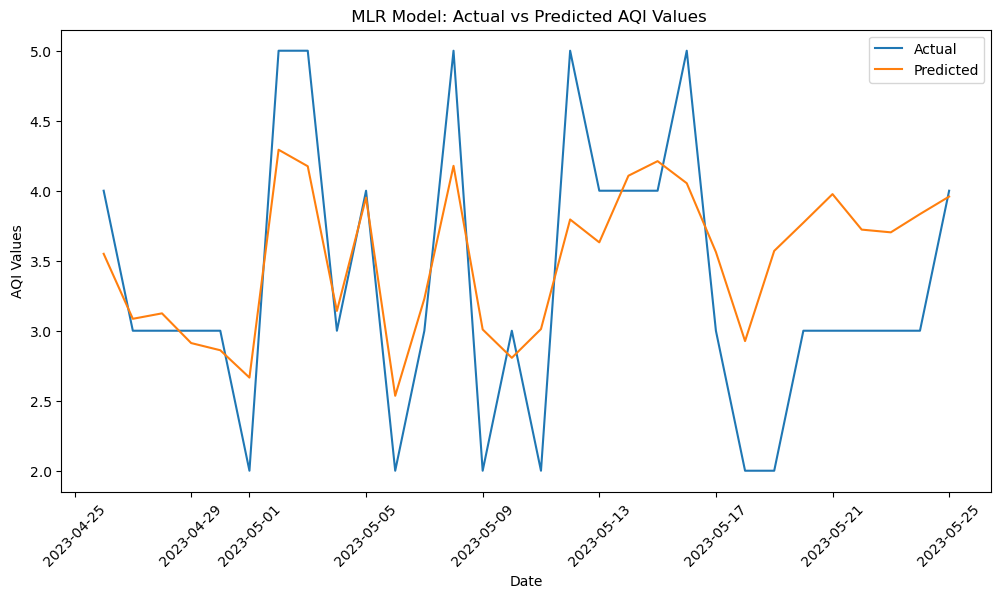

In [115]:
plt.figure(figsize=(12, 6))

plt.plot(date_wise_predictions['Date'], date_wise_predictions['Actual'], label='Actual')
plt.plot(date_wise_predictions['Date'], date_wise_predictions['Predicted'], label='Predicted')
plt.xlabel('Date')
plt.ylabel('AQI Values')
plt.title(' MLR Model: Actual vs Predicted AQI Values')
plt.xticks(rotation=45)
plt.legend()
plt.show()


In [ ]:
##################################################################################

In [ ]:
#################### SVR ####################################

In [116]:

train_df, test_df = train_test_split(df, test_size=30, shuffle=False)  # Last 30 days for test


features = ['co', 'no', 'no2', 'o3', 'so2', 'pm2_5', 'pm10', 'nh3']
target = 'aqi'

svr_regressor = SVR()
svr_regressor.fit(train_df[features], train_df[target])

test_predictions = svr_regressor.predict(test_df[features])

date_wise_predictions = pd.DataFrame({'Date': test_df['date'], 'Actual': test_df[target], 'Predicted': test_predictions})

mse = mean_squared_error(date_wise_predictions['Actual'], date_wise_predictions['Predicted'])
print('Mean Squared Error:', mse)


Mean Squared Error: 0.28606272141854816


In [117]:
svr_regressor.score(test_df[features], test_df[target])


0.7006320357247752

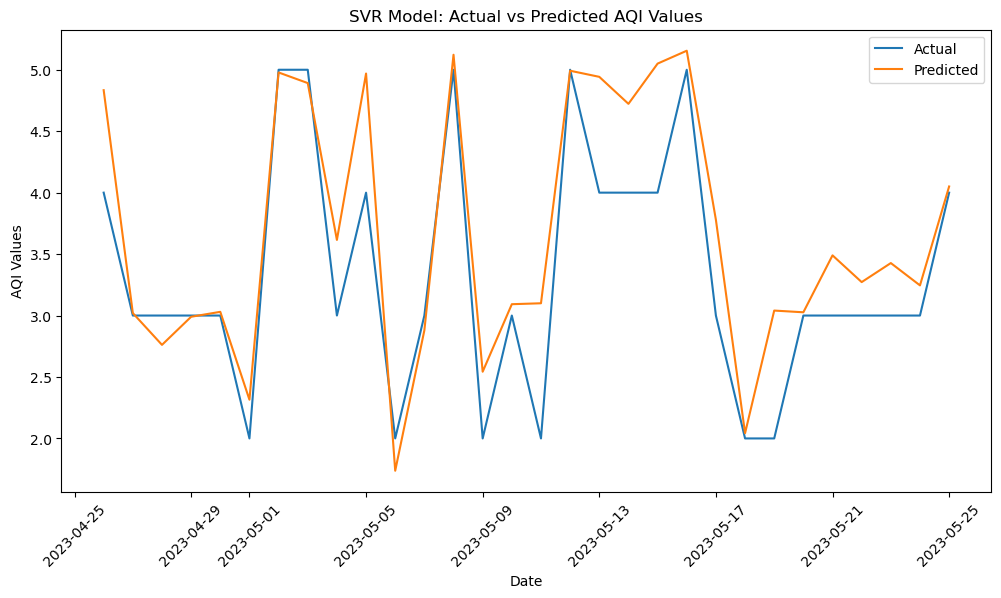

In [118]:
plt.figure(figsize=(12, 6))

plt.plot(date_wise_predictions['Date'], date_wise_predictions['Actual'], label='Actual')
plt.plot(date_wise_predictions['Date'], date_wise_predictions['Predicted'], label='Predicted')
plt.xlabel('Date')
plt.ylabel('AQI Values')
plt.title('SVR Model: Actual vs Predicted AQI Values')
plt.xticks(rotation=45)
plt.legend()
plt.show()

In [ ]:
############################  Hyper Parameter Tuning of SVR ################################

In [ ]:
train_df, test_df = train_test_split(df, test_size=30, shuffle=False)  # Last 30 days for test


features = ['co', 'no', 'no2', 'o3', 'so2', 'pm2_5', 'pm10', 'nh3']
target = 'aqi'


param_grid = {
    'C': [0.1, 1, 10],                    # Regularization parameter
    'gamma': ['scale', 'auto'],           # Kernel coefficient for 'rbf', 'poly', and 'sigmoid'
    'kernel': ['linear', 'poly', 'rbf'],  # Kernel type
}


svr_regressor = SVR()

grid_search = GridSearchCV(estimator=svr_regressor, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(train_df[features], train_df[target])

best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_

print("Best Parameters:", best_params)


test_predictions = best_estimator.predict(test_df[features])


date_wise_predictions = pd.DataFrame({'Date': test_df['date'], 'Actual': test_df[target], 'Predicted': test_predictions})

mse = mean_squared_error(date_wise_predictions['Actual'], date_wise_predictions['Predicted'])
print('Mean Squared Error:', mse)


In [ ]:
#########################################################################

In [ ]:
########################## XGBoost Regressor ##############################

In [119]:
train_df, test_df = train_test_split(df, test_size=30, shuffle=False)  # Last 30 days for test

features = ['co', 'no', 'no2', 'o3', 'so2', 'pm2_5', 'pm10', 'nh3']
target = 'aqi'

X_train, y_train = train_df[features], train_df[target]
X_test, y_test = test_df[features], test_df[target]

xgb_regressor = xgb.XGBRegressor()

xgb_regressor.fit(X_train, y_train)


test_predictions = xgb_regressor.predict(X_test)

date_wise_predictions = pd.DataFrame({'Date': test_df['date'], 'Actual': y_test, 'Predicted': test_predictions})

mse = mean_squared_error(y_test, test_predictions)
print('Mean Squared Error:', mse)


Mean Squared Error: 0.5124461341214792


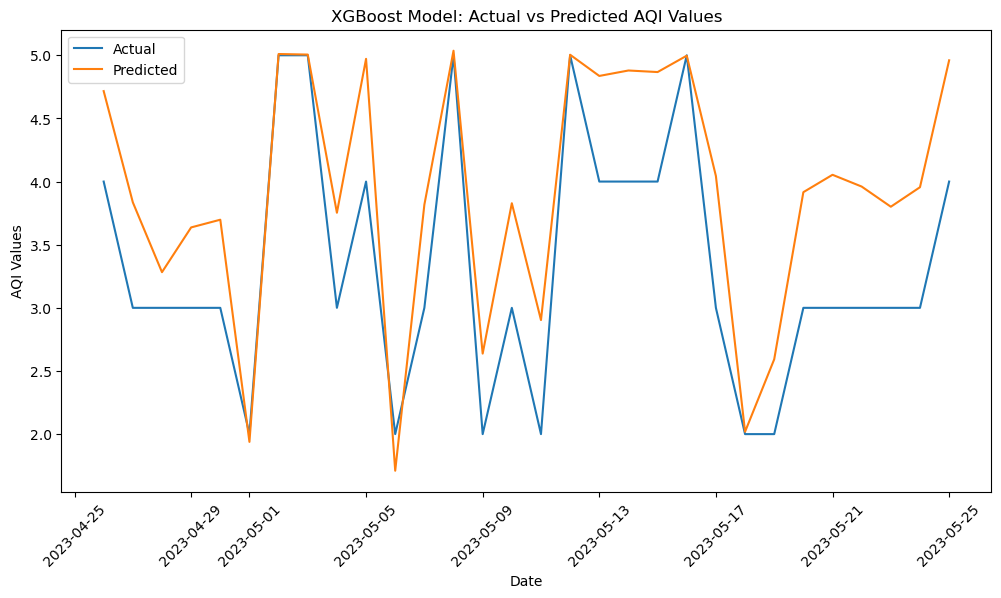

In [120]:
plt.figure(figsize=(12, 6))

plt.plot(date_wise_predictions['Date'], date_wise_predictions['Actual'], label='Actual')
plt.plot(date_wise_predictions['Date'], date_wise_predictions['Predicted'], label='Predicted')
plt.xlabel('Date')
plt.ylabel('AQI Values')
plt.title('XGBoost Model: Actual vs Predicted AQI Values')
plt.xticks(rotation=45)
plt.legend()
plt.show()

In [ ]:
###################### Hyperparameter Tuning for XGBoost #################

In [ ]:
train_df, test_df = train_test_split(df, test_size=30, shuffle=False)  # Last 30 days for test

features = ['co', 'no', 'no2', 'o3', 'so2', 'pm2_5', 'pm10', 'nh3']
target = 'aqi'

xgb_regressor = xgb.XGBRegressor()

param_grid = {
    'learning_rate': [0.1, 0.01, 0.001],  # Learning rate
    'max_depth': [3, 5, 7],                # Maximum depth of the tree
    'n_estimators': [100, 200, 300],       # Number of trees
}


grid_search = GridSearchCV(estimator=xgb_regressor, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(train_df[features], train_df[target])


best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_
print("Best Parameters:", best_params)

test_predictions = best_estimator.predict(test_df[features])

date_wise_predictions = pd.DataFrame({'Date': test_df['date'], 'Actual': test_df[target], 'Predicted': test_predictions})

mse = mean_squared_error(date_wise_predictions['Actual'], date_wise_predictions['Predicted'])
print('Mean Squared Error:', mse)
